In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [18]:
pd.set_option('display.max_rows',100)

In [2]:
#importing the  dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# we have to predict wheather a person has income of $50k per year or not.So from this respective statement we can conclude that  target is Income and  is a Classification Poblem.

In [4]:
#data types of columns in the datset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we have Workclass,Education ,Marital_status, Occupation, Relationship, Race, Sex,Native_country, Income as object datatypes,


Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week columns  are integer datatypes.

In [6]:
#duplicates removal
df.drop_duplicates(inplace=True)
#Checking shapes of dataset
df.shape

(32560, 15)

There are 32560 rows and 15 columns in total in the dataset,we are able to see there are no duplicates in the dataset as  well

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The best part is we won't have null values in dataset but we should check whether we have some other informal data and need to clean it

In [9]:
#Checking null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#Checking unique values of each column in the dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

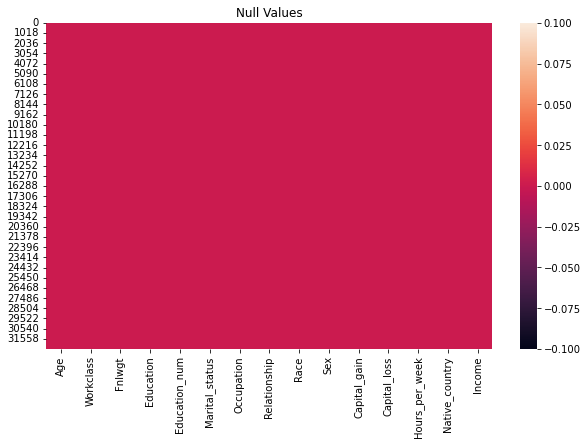

In [11]:
#Visualising null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [ ]:
#count of each data classes in the dataset

In [12]:
df.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

we have 73 unique ages in the dataset

In [13]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

we are able to see the majority  of the data is of employed in  private  and we can see 7 people never worked in any organisation as well.we are able to see large numbers in rest of the locations people worked as well.

In [14]:
df.Fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

we are able to see there are 21647 people having different Fnlwgt in the dataset

In [15]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

we are able to observe highschool graduates are of 10501 which is the majority in the dataset and least with 51 in preschool based the current dataset

In [16]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

we are able to observe  10501 people with education number of 9 and least withe education number in 1 with 51,we can also observe large number in the educationnumber 10 as well.

In [17]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

we are able to observe Married-civ-spouse has the highest number with 14976 and never married in the dataset is of 10682

we are also able to observe Married-AF-spouse in the dataset is the least with 23 .

In [18]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

we are able to see large number in Prof-specialty, Craft-repair ,Exec-managerial, Adm-clerical,Sales , Other-service,Machine-op-inspct
are more than 2000 in numbers in the dataset.

we can see least number with 9 n the datset is  for Armed-Forces in the occupation

In [19]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

in the dataset we can observe majority of the people are husband with 13193 and  Not-in-family,Unmarried are more than 5000 in the datset 

Other-relative are 981 in the dataset in the relation category

In [20]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

we can see white people in the race with 27815 in the dataset and rest with Black and Asian-Pac-Islander having more than 1000 in the dataset 

we can see the least in the datset for  Othercategory in Race

In [22]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

we can see  a large number of the datset consists of male and male is twice the female count in the dastset

In [21]:
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

we are able to see 119 different  values in the datsets starting high count in zero value

In [19]:
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
2001       24
1669       24
1741       24
1980       23
1719       22
2051       21
2002       21
1408       21
1579       20
2377       20
1504       18
1721       18
1974       18
2339       17
2179       15
1628       15
1762       14
2559       12
625        12
2444       12
2824       10
1617        9
2042        9
2205        9
2392        9
1651        9
1594        8
2174        7
1380        7
1340        7
1092        7
2206        6
2057        6
880         6
1573        6
2246        6
2603        5
213         4
1825        4
1668        4
1258        4
2547        4
1726        4
2129        3
419         3
2231        3
2267        3
2457        3
323         3
653         3
4356        3
3770        2
1755        2
3683        2
1648        2
2754        2
3900        2
1138  

in the Capital_loss column we can see 92 unique values in the dataset with majority in zero value

In [20]:
df.Hours_per_week.value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
3        39
33       39
39       38
41       36
14       34
2        32
27       30
26       30
49       29
17       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       17
19       14
64       14
85       13
51       13
68       12
11       11
98       11
63       10
78        8
29        7
77        6
31        5
59        5
96        5
67        4
76        3
81        3
91        3
61        2
86  

we are able to observe major number in the  40 Hours_per_week in the datset with 15216 and least we can see decrease in the count  along the dataset

In [26]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

in the dataset we can see the large number of people are from United-States with 29169 and rest of the dataset is less than 1000 ,the least number in teh dataset is for Holand-Netherlands with only single number 

In [27]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

in the target variable we can see the majority of the data is <=50K with 24719 and  >50K are of  7841 in the current dataset

<AxesSubplot:xlabel='Income', ylabel='count'>

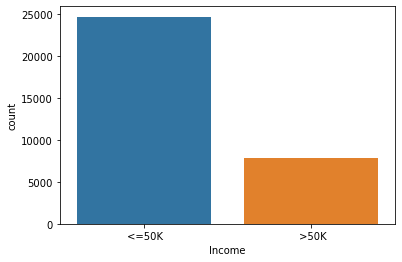

In [29]:
 #Count plot for Income
sns.countplot(df.Income)

By looking into the count plot of target we can say that there is a data imbalancing issue.And also we  can say that People with salary >50k per year are very less.Most of the people are getting income below 50k per year.

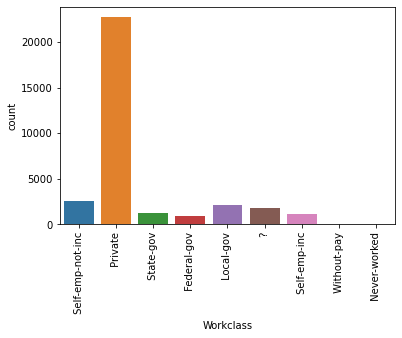

In [33]:
#Count plot for Workclass
sns.countplot(df.Workclass)
plt.xticks(rotation=90);


So maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked in the dataset.

 Self-emp-not-inc and Local-gov are more than 2000 in the dataset

<AxesSubplot:xlabel='Education_num', ylabel='count'>

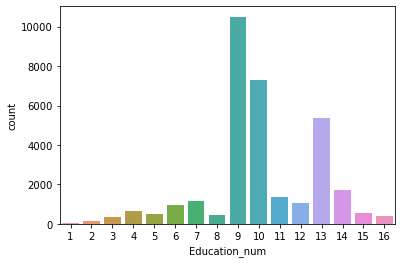

In [34]:
#Count plot for Education_num
sns.countplot(df.Education_num)

 max no of count is in Education number 9,10,13 and very less people belong to 1,2,3 group in the datset.

the Education number 9 we can observe 10501 and number 10 with 7291 and 13 with 5354 in the current dataset.


the Education number 1 with 51 and Education number 2 and 3 are having  168 and 333 consequently

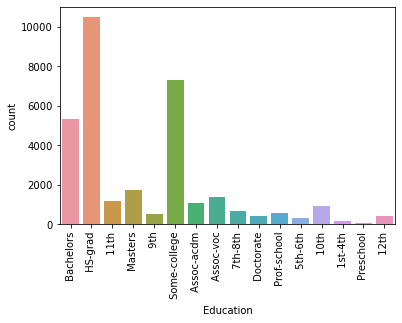

In [3]:
#Count plot for Education
sns.countplot(df.Education)
plt.xticks(rotation=90);

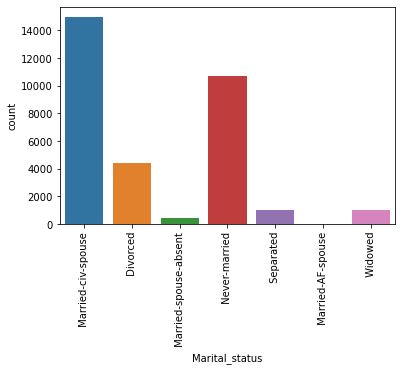

In [36]:
#Count plot for Marital_status
sns.countplot(df.Marital_status)
plt.xticks(rotation=90);

In [6]:
#People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

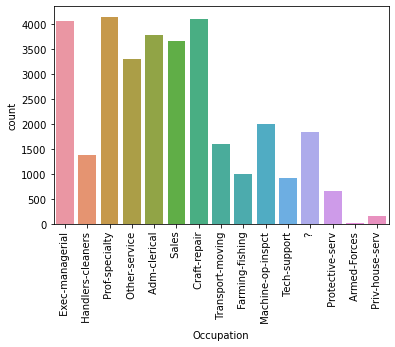

In [38]:

# for Occupation
sns.countplot(df.Occupation)
plt.xticks(rotation=90);

In [7]:
#Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

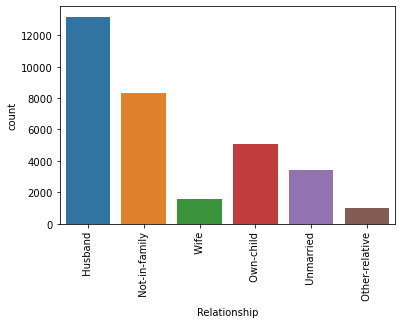

In [40]:
#Checking the value count of Relationship column
sns.countplot(df.Relationship)
plt.xticks(rotation=90);

In [8]:
#we can see the major relationship category is hiusband and least with Other-relative in the dataset

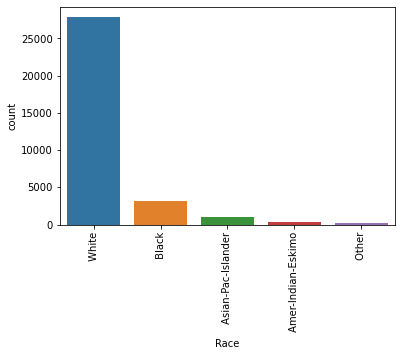

In [41]:
#Factor plot for Race
sns.countplot(df.Race)
plt.xticks(rotation=90);

In [ ]:
#we can obser a large percentage of the dataset is with white in race and least in the Other race

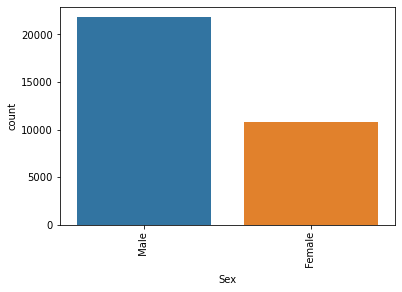

In [42]:
#Factor plot for Sex
sns.countplot(df.Sex)
plt.xticks(rotation=90);

In [10]:
#we can see twice the number of male compared to female people in the dataset

In [11]:
#we can observe in the male category we have 21789
#we can observe in the male category we have 10771 in the dataset given

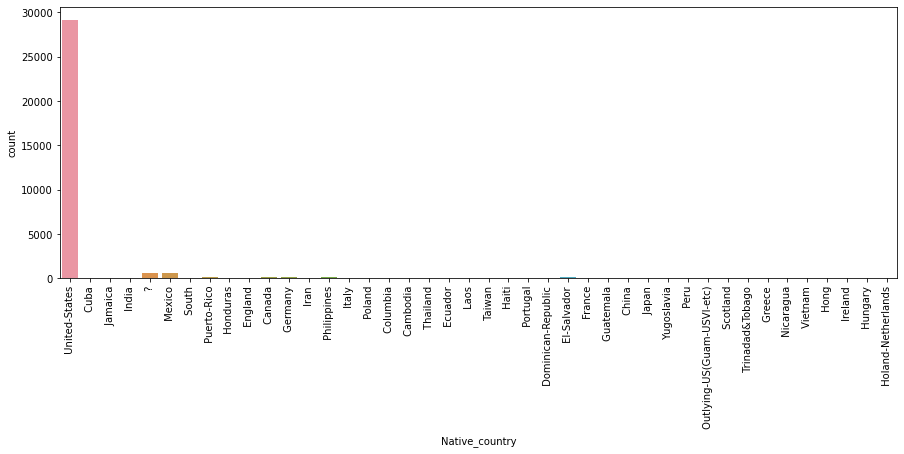

In [47]:
#Factor plot for Native_country
plt.figure(figsize=(15,5))
sns.countplot(df.Native_country)
plt.xticks(rotation=90);

In [ ]:
#So most of the people in US gets job rather than all other states as per the datset.

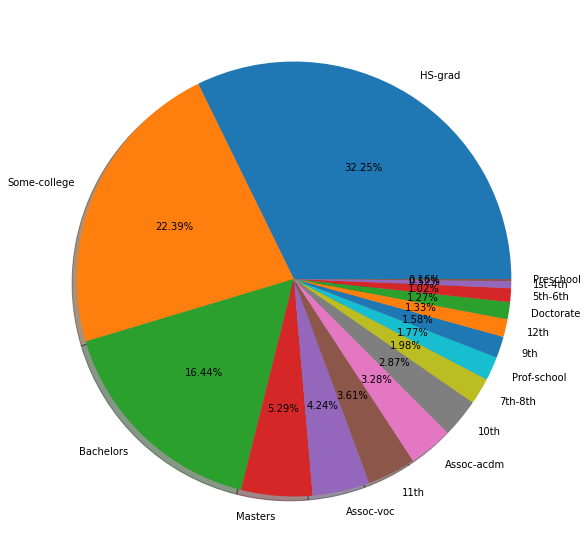

In [29]:
labl=['HS-grad','Some-college','Bachelors','Masters','Assoc-voc',
 '11th','Assoc-acdm','10th','7th-8th','Prof-school','9th','12th',
      'Doctorate','5th-6th','1st-4th','Preschool']
plt.figure(figsize=(15,10))
plt.pie(df.Education.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

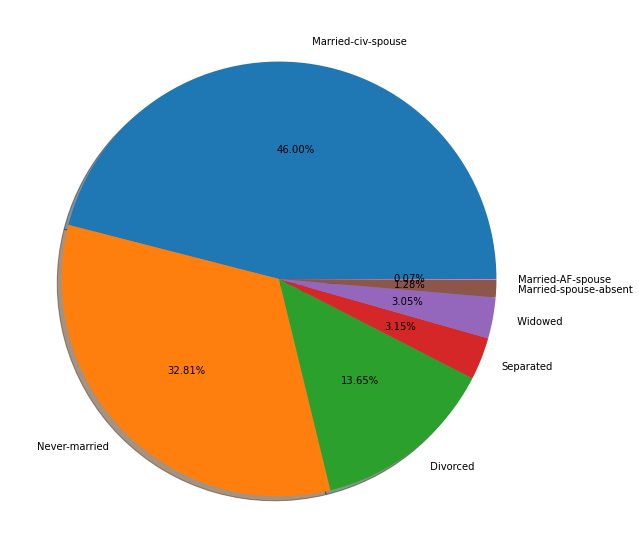

In [31]:
labl=[' Married-civ-spouse', 'Never-married', ' Divorced',
       'Separated', ' Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
plt.figure(figsize=(15,10))
plt.pie(df.Marital_status.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe the major data is contributed by ' Married-civ-spouse' and least by 'Married-AF-spouse' in the dataset

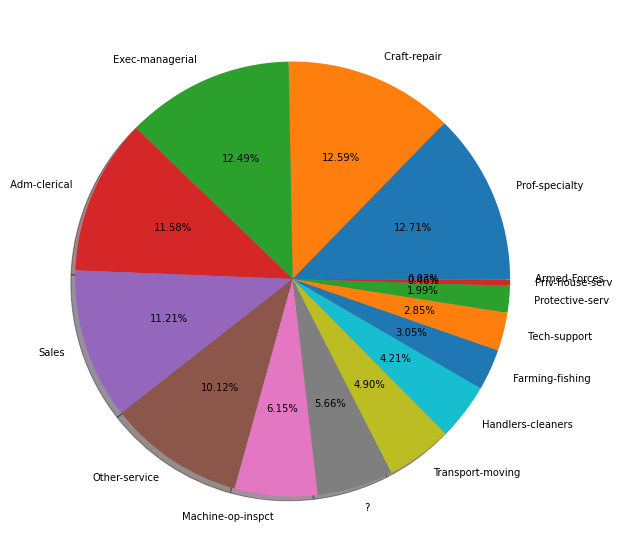

In [32]:
labl=[' Prof-specialty', ' Craft-repair', 'Exec-managerial',
       ' Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct',
       ' ?', 'Transport-moving', 'Handlers-cleaners',
       ' Farming-fishing', ' Tech-support', ' Protective-serv', ' Priv-house-serv',
       ' Armed-Forces']
plt.figure(figsize=(15,10))
plt.pie(df.Occupation.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

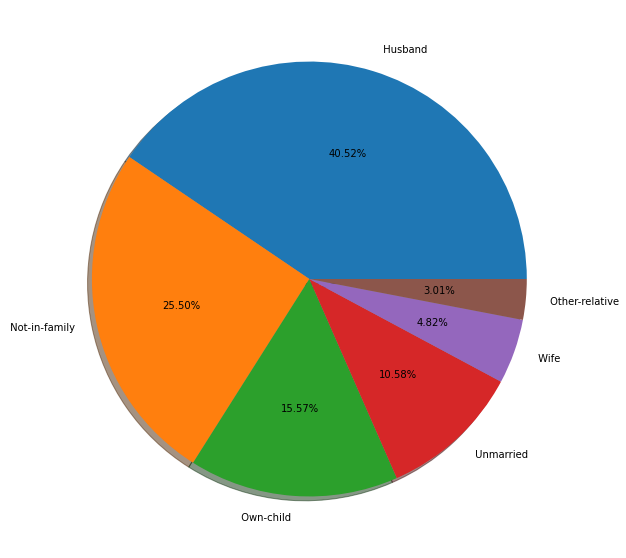

In [33]:
labl=[' Husband', ' Not-in-family', '  Own-child', ' Unmarried', ' Wife',
       ' Other-relative']
plt.figure(figsize=(15,10))
plt.pie(df.Relationship.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

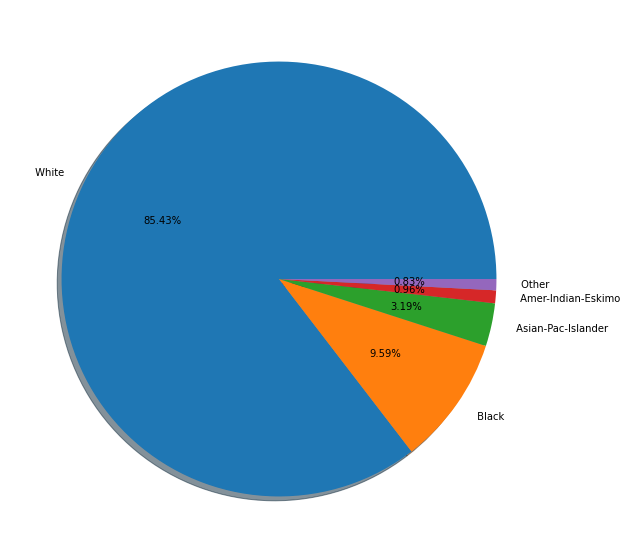

In [80]:
labl=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']
plt.figure(figsize=(15,10))
plt.pie(df.Race.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

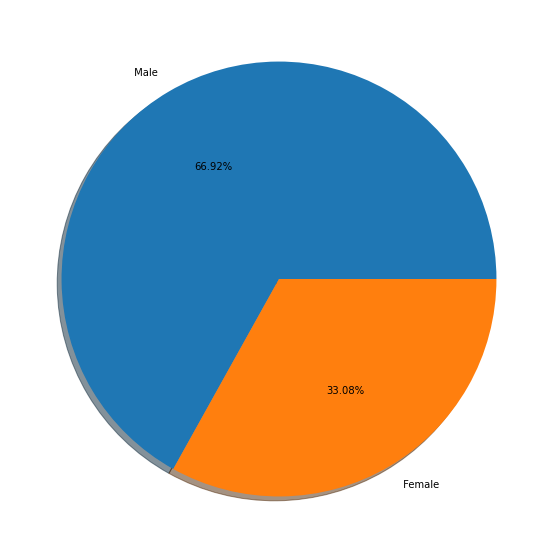

In [81]:
labl=[' Male', ' Female']
plt.figure(figsize=(15,10))
plt.pie(df.Sex.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

we can observe the majority is for males with 66.92% in the dataset and
females with 33% in the dataset


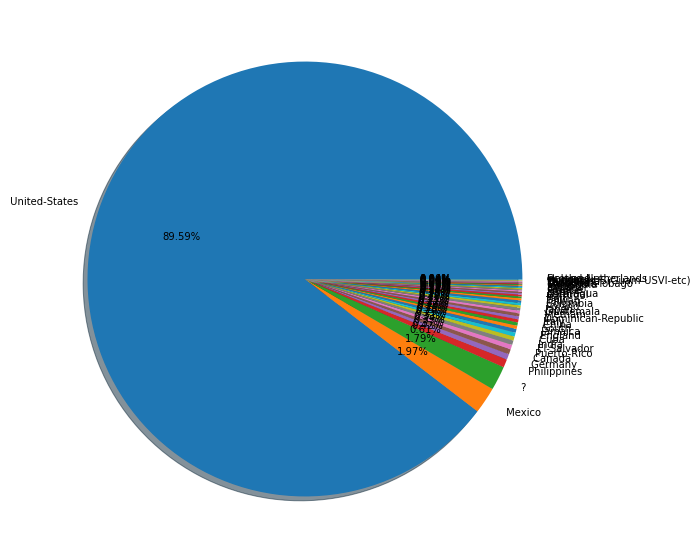

In [34]:
labl=[' United-States', ' Mexico', ' ?', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England',
       ' Jamaica', ' South', ' China', ' Italy', ' Dominican-Republic',' Vietnam', 
      ' Guatemala', ' Japan', ' Poland', ' Columbia',
       ' Taiwan', ' Haiti', ' Iran', ' Portugal',' Nicaragua', ' Peru', ' France', ' Greece', ' Ecuador',
       ' Ireland', ' Hong', ' Cambodia', ' Trinadad&Tobago',
       ' Laos', ' Thailand', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' Honduras',
       ' Hungary', ' Scotland', ' Holand-Netherlands']

plt.figure(figsize=(15,10))
plt.pie(df.Native_country.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

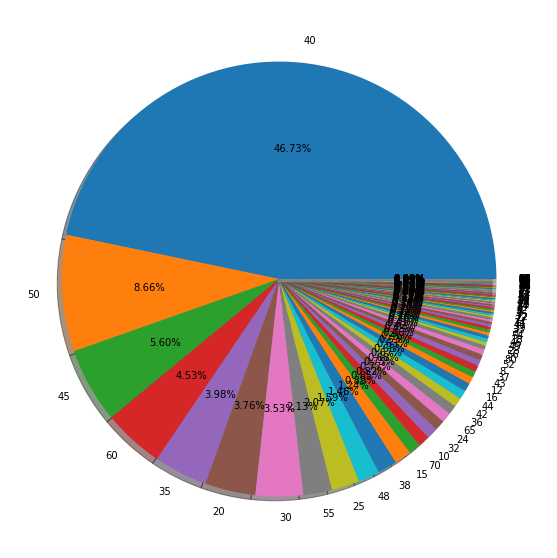

In [37]:
labl=[40,50,45,60,35,20,30,55,25,48,38,15,70,10,32,
     24,65,36,42,44,16,12,43,37,8,52,80,56,28,49,46,18,
    54,3,33,39,41,14,2,27,72,75,6,5,4,47,84,22,
     26,49,17,90,34,58,7,53,21,13,23,1,62,9,57,66,19,64,85,
     51,68,11,98,63,78,29,77,31,59,96,67,76,81,91,61,86,95,97,89,73,
     88,82,94,92,74,87]
plt.figure(figsize=(15,10))
plt.pie(df.Hours_per_week.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

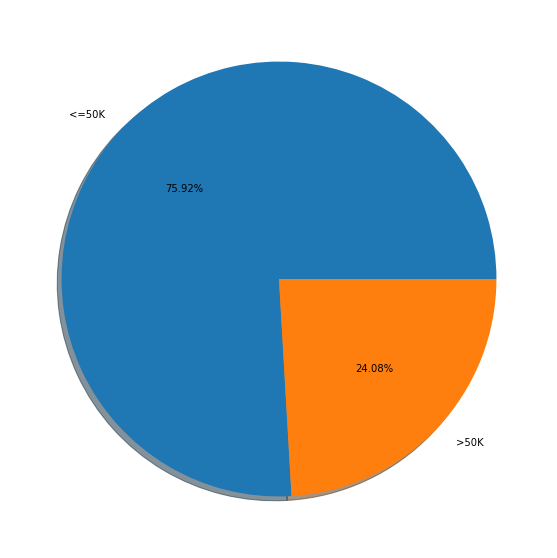

In [85]:
labl=[' <=50K', ' >50K']
plt.figure(figsize=(15,10))
plt.pie(df.Income.value_counts(),labels=labl,autopct='%1.2f%%', shadow=True);

we can observe the traget variable <50k income is 76% in the dataset and income with less than 50k is 24% in the dataset

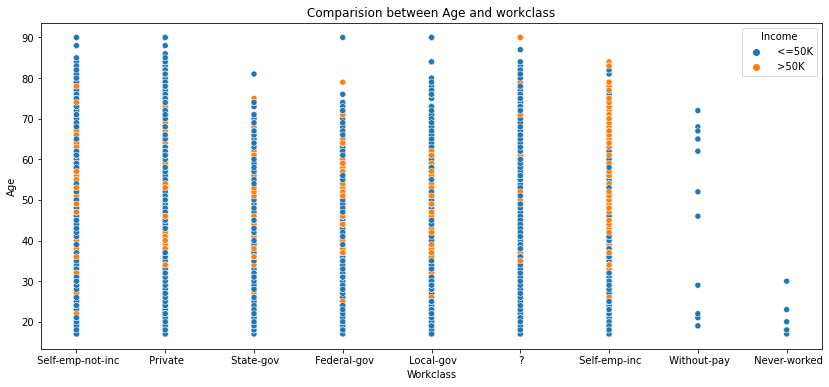

In [38]:
plt.figure(figsize=[14,6])
plt.title('Comparision between Age and workclass')
sns.scatterplot(df.Workclass,df.Age,hue=df.Income);

As the age increases along each working classes we can see higher probaility of people with income less than 50 k and and we can observe in the income above 50k for the classes selfemployed and local gov and self employed and private and state gov and federal gov .The majoruty of 5ok income more is for self emp inc and local gov anf federal gov working class in the dataset.

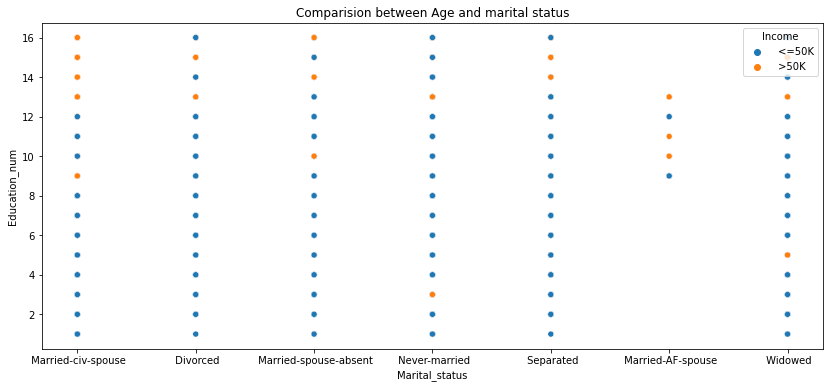

In [39]:
#Comparision between features using scatter plot
plt.figure(figsize=[14,6])
plt.title('Comparision between Education num and marital status')
sns.scatterplot(df.Marital_status,df.Education_num,hue=df.Income);

along the marital status classes we can observe high probality of recieving income less than 50k as the education number increases below 10 and above 10 we can see the higher probability of recieving income more than 50k in the dataset

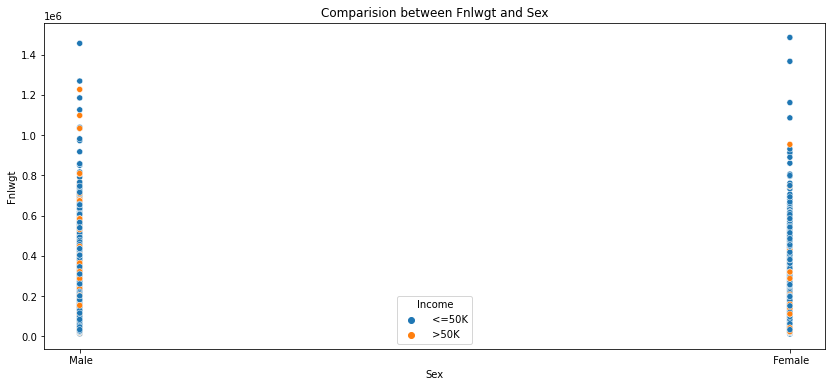

In [40]:
plt.figure(figsize=[14,6])
plt.title('Comparision between Fnlwgt and Sex')
sns.scatterplot(df.Sex,df.Fnlwgt,hue=df.Income);

we can observe that the males have higher probability to recieve income more than 50k with fnlwght increament.With less fnlwght we can see higher probability to recieve income less than 50k for male and female

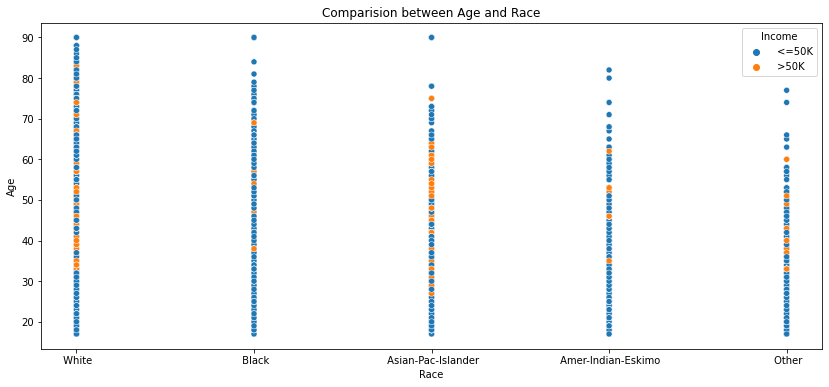

In [41]:
plt.figure(figsize=[14,6])
plt.title('Comparision between Age and Race')
sns.scatterplot(df.Race,df.Age,hue=df.Income);

in the races categories as the age increases we can see less probability to recieve the income greater than 50k except asian pac islander race in the dataset

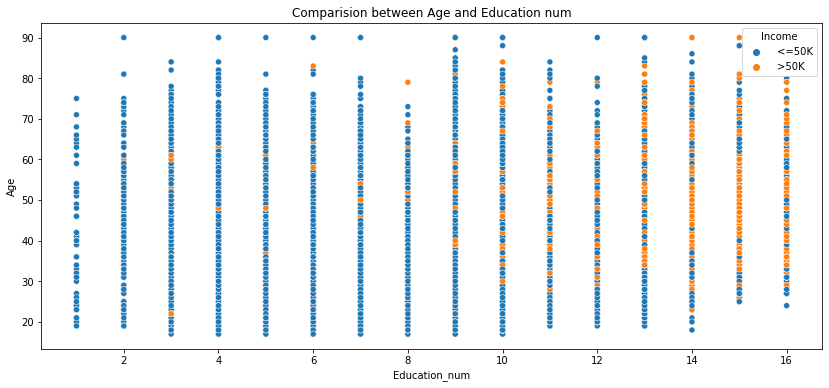

In [42]:
plt.figure(figsize=[14,6])
plt.title('Comparision between Age and Education num')
sns.scatterplot(df.Education_num,df.Age,hue=df.Income);

As the education level increase we are able to that the Age also increases and the chances of recieving income more than 50k increases in the dataset

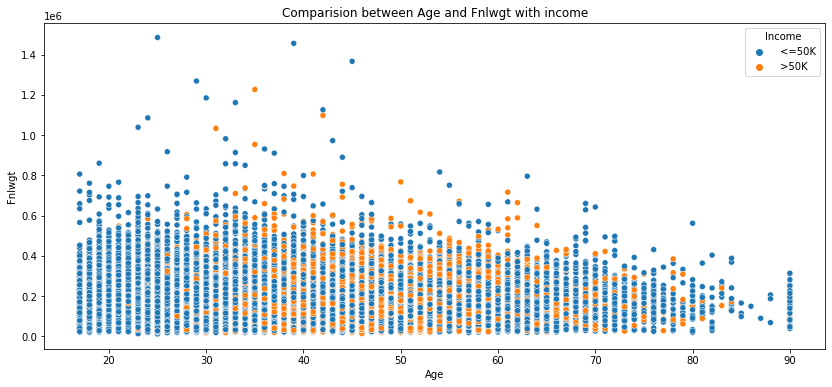

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=[14,6])
plt.title('Comparision between Age and Fnlwgt with income')
sns.scatterplot(df.Age,df.Fnlwgt,hue=df.Income);

As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

In [100]:
#relationship for each feature name with the output

def scat_plt(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df.Income,color='red')

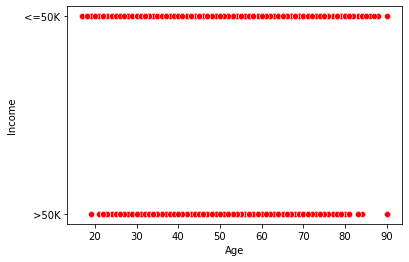

In [101]:
scat_plt(0)

we are able to see the value of Age  is normally distributed in the range 20 to 85.in the rest of the range it is unevenly distributed

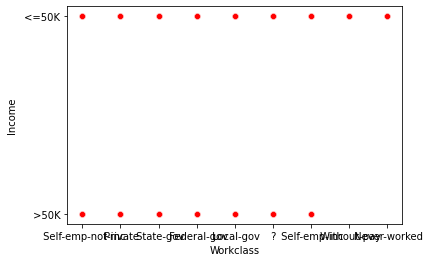

In [102]:
scat_plt(1)

since  workclass is categorical variables data it is unevenly distributed in the dataset.

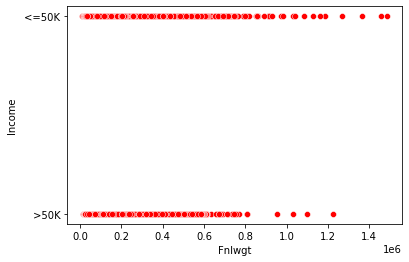

In [103]:
scat_plt(2)

we are able to see the value of Fnlwgt is normally distributed in the range 0 to 0.8 ,in the rest of the range it is unevenly distributed

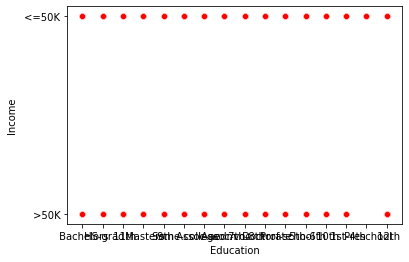

In [104]:
scat_plt(3)

since  Education is categorical variables data it is unevenly distributed in the dataset.

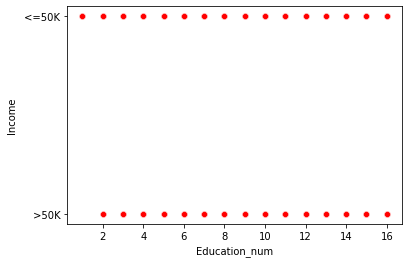

In [105]:
scat_plt(4)

Education num is  unevenly distributed in the dataset.

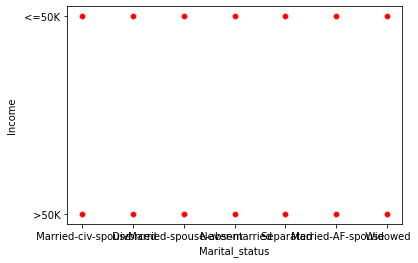

In [106]:
scat_plt(5)

since  Marital status is categorical variables data it is unevenly distributed in the dataset.

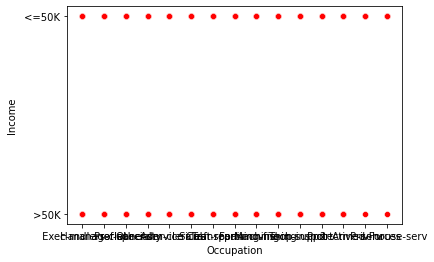

In [107]:
scat_plt(6)

since  Occupations is categorical variables data it is unevenly distributed in the dataset.

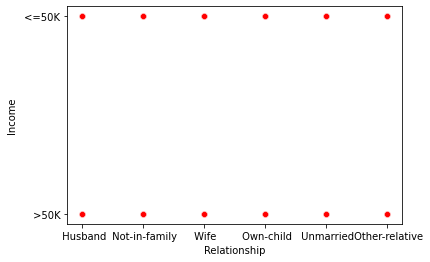

In [108]:
scat_plt(7)

since  Relationship is categorical variables data it is unevenly distributed in the dataset.

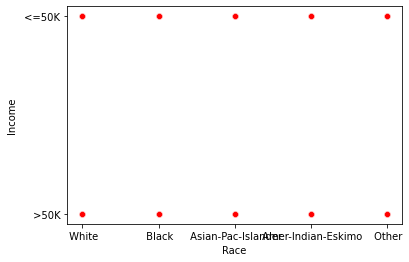

In [109]:
scat_plt(8)

since Race is categorical variables data it is unevenly distributed in the dataset.

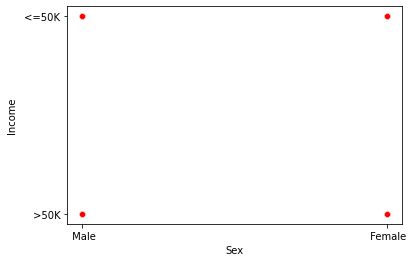

In [110]:
scat_plt(9)

since native countries is categorical variables data it is unevenly distributed in the dataset.

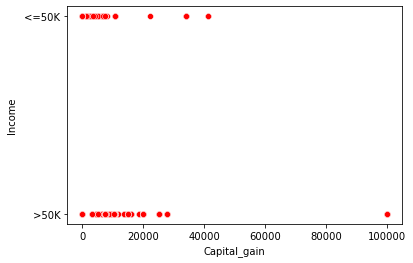

In [111]:
scat_plt(10)

we are able to see the value of capital gain  is normally distributed in the range 0 to 15000.in the rest of the range it is unevenly distributed

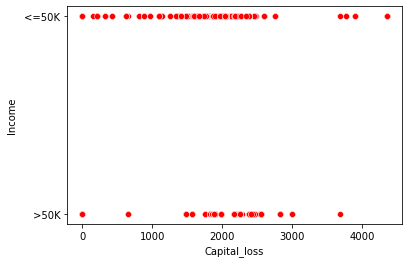

In [112]:
scat_plt(11)

we are able to see the value of capital loss  is normally distributed in the range 1500 to 2600.in the rest of the range it is unevenly distributed

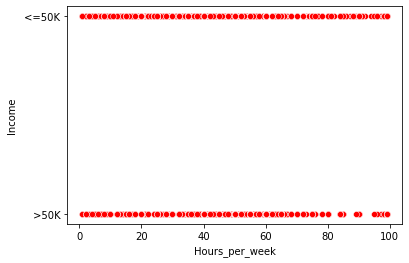

In [115]:
scat_plt(12)

we are able to see the value of hoursper week  is normally distributed in the range 0 to 80.

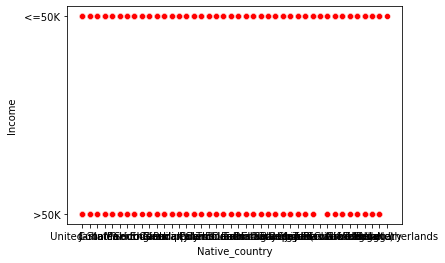

In [116]:
scat_plt(13)

since it is native countries is categorical variables data it is unevenly distributed in the dataset.

# Multivariate Analysis

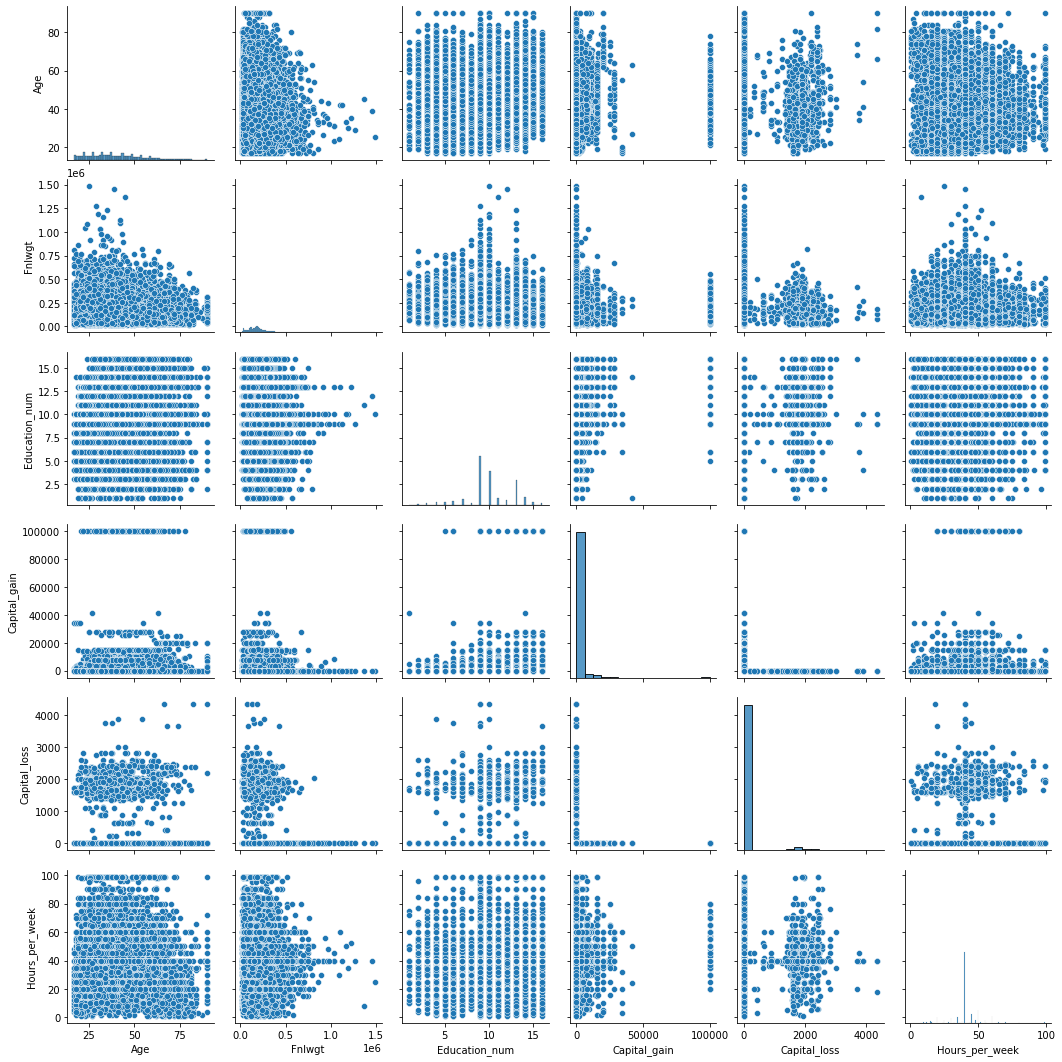

In [118]:
#pair ploting for df
sns.pairplot(df)

Above are the pair plots of df.And we can say that there are some extreme outliers in the dataset.And we have some skewness also

# Encoding

In [128]:

OE=OrdinalEncoder()

df['Workclass']=OE.fit_transform(df['Workclass'].values.reshape(-1,1))

df['Education']=OE.fit_transform(df['Education'].values.reshape(-1,1))

df['Marital_status']=OE.fit_transform(df['Marital_status'].values.reshape(-1,1))

df['Occupation']=OE.fit_transform(df['Occupation'].values.reshape(-1,1))

df['Relationship']=OE.fit_transform(df['Relationship'].values.reshape(-1,1))

df['Race']=OE.fit_transform(df['Race'].values.reshape(-1,1))

df['Sex']=OE.fit_transform(df['Sex'].values.reshape(-1,1))

df['Native_country']=OE.fit_transform(df['Native_country'].values.reshape(-1,1))



In [124]:
LE=LabelEncoder()
df.Income=LE.fit_transform(df.Income)

In [ ]:
#successfully encoded all the data in the dataset 

In [129]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


In [113]:
columns=df.columns

In [130]:

#distribution plot

def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='brown',bins=5)
    


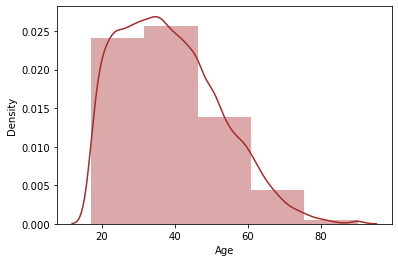

In [131]:
dtp(0)

In [ ]:
#The AGE data looks right skewed.The building block is out of the normalised curve.

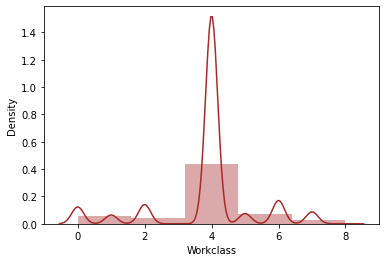

In [132]:
dtp(1)

In [44]:
#The data looks  skewed. it is a categorical data

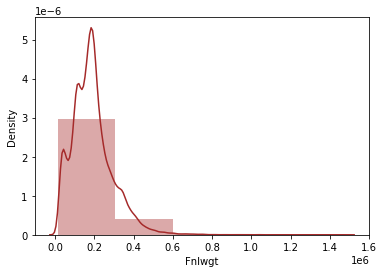

In [133]:
dtp(2)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

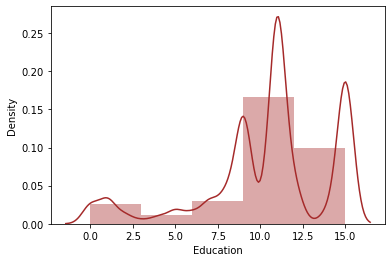

In [134]:
dtp(3)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.

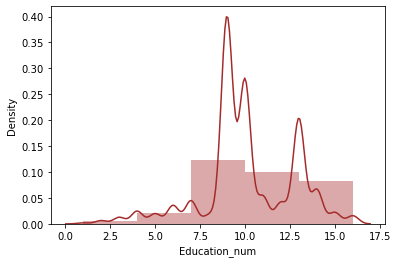

In [135]:
dtp(4)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve.

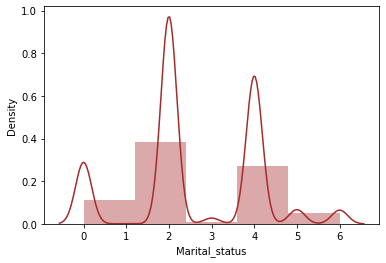

In [136]:
dtp(5)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve. it is a categorical data

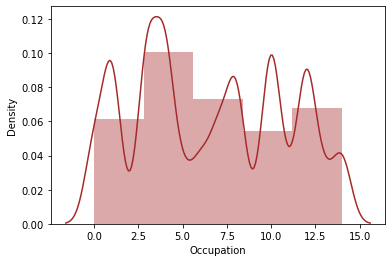

In [137]:
dtp(6)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve. it is a categorical data

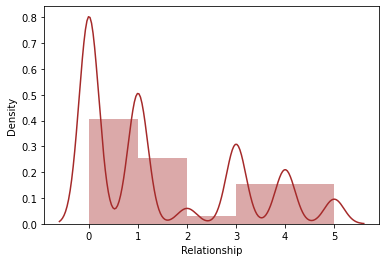

In [138]:
dtp(7)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve. it is a categorical data

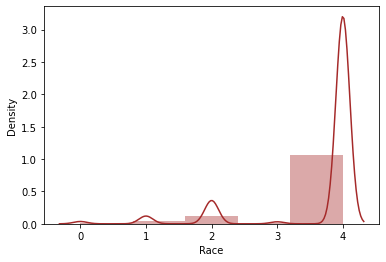

In [139]:
dtp(8)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve. it is a categorical data

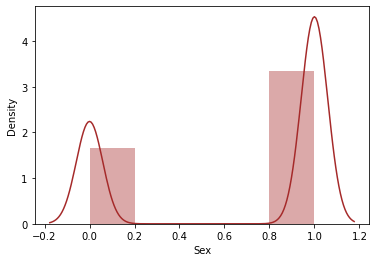

In [140]:
dtp(9)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.and it binomial.

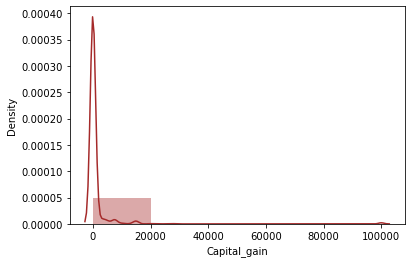

In [141]:
dtp(10)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

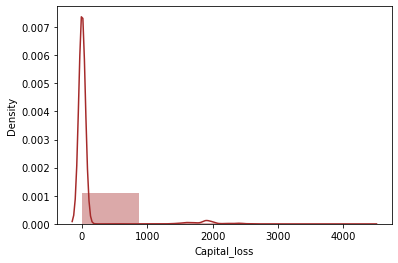

In [142]:
dtp(11)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

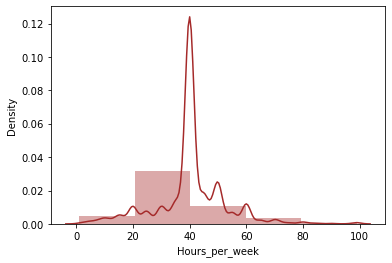

In [143]:
dtp(12)

In [ ]:
#normal distrinution of the dataset is being observed


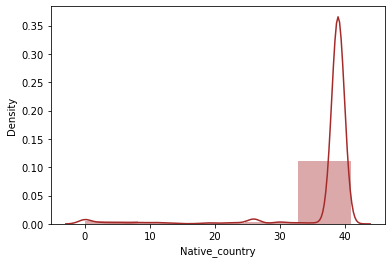

In [144]:
dtp(13)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve. it is a categorical data

# Detecting Outliers

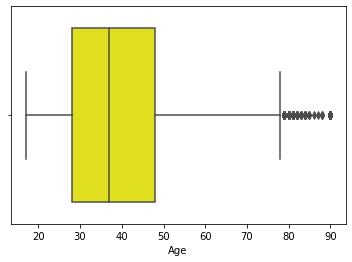

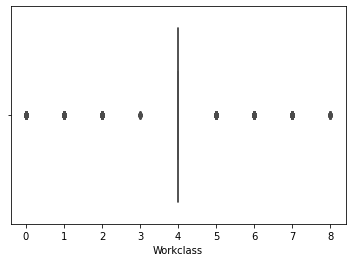

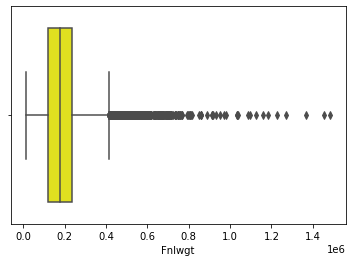

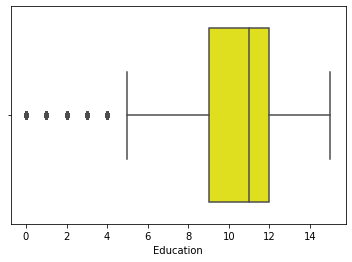

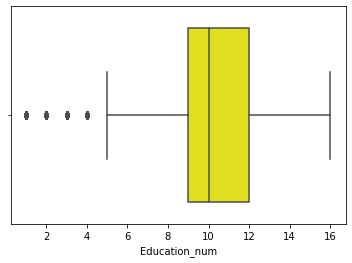

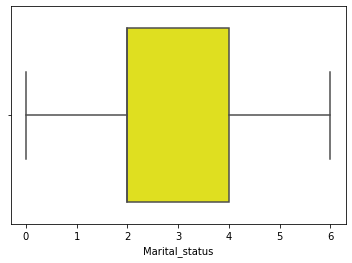

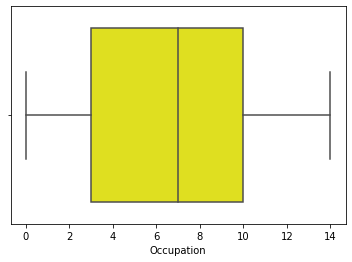

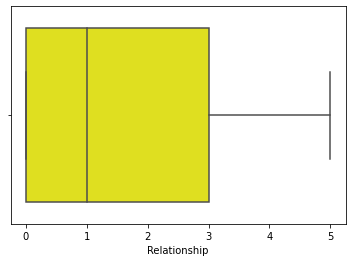

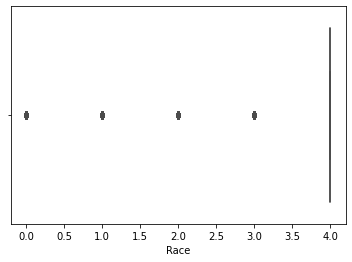

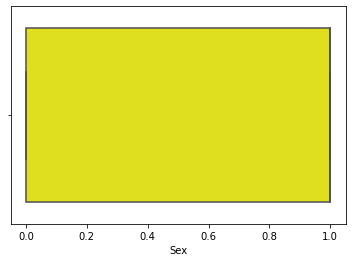

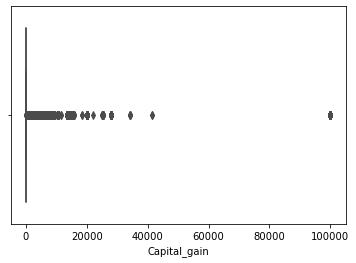

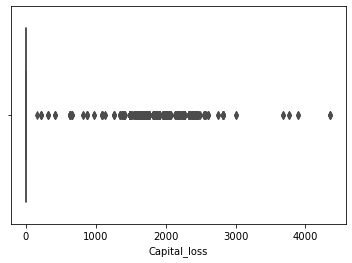

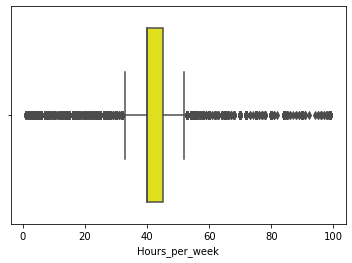

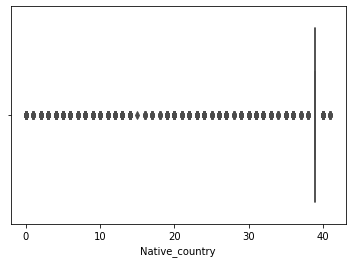

In [145]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='yellow')
for i in range(0,14):
    bxplt(i)

we are able to observe Outliers in Age,Fnlwgt,Caputal gain,capital loss,Education_num,Hours_per_week,we can ignore the outliers in the categorical columns

# Removing outliers

In [158]:
#saving the continous column datasets to check for outliers
df_outlier=df[['Age','Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']]


In [159]:
#zscore

z=np.abs(zscore(df_outlier))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [161]:
#printing the outliers points in the dataset
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [162]:
#saving the data without outlier points 
df_new=df[(z<3).all(axis=1)]

In [163]:
#number of rows in df_new
df_new.shape[0]

29827

In [164]:
#chcking data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

8.393734643734643


In zscore method the dataloss is 8.393% which is more than 10%. lets  have look into IQR method also

# IQR (Inter Quantile Range)

In [165]:
# 1st quantile
Q1=df_outlier.quantile(0.25)

# 3rd quantile
Q3=df_outlier.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [166]:
#Checking shape of new dataset
df_1.shape

(18997, 15)

In [167]:
#chcking data loss
data_loss=((df.shape[0]-df_1.shape[0])/df.shape[0])*100
print(data_loss)

41.6554054054054


There is a great dataloss in IQR method.

so we will go with zscore in dataset for outlier removal.

In [168]:
#saving the upadated dataset 
df=df_new


In [169]:
df.shape

(29827, 15)

# Skewness Removal

In [182]:
#initialising X and y
X=df.drop(['Income'],axis=1)
y=df.Income

In [183]:
X.skew()

Age                0.491112
Workclass         -0.743069
Fnlwgt             0.634168
Education         -0.942866
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.120320
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -3.738803
dtype: float64

we are able to observe skewness in Fnlwgt ,Capital_gain,Capital_loss in the dataset,we can observe skewness in the categorical columns which is acceptable

In [173]:
#displating max_rows
pd.set_option('display.max_rows',None)

In [184]:
feat=['Age','Fnlwgt','Capital_gain','Capital_loss']
from sklearn.preprocessing import PowerTransformer
X[feat]=PowerTransformer(method='yeo-johnson').fit_transform(X[feat])

In [185]:
X[feat].skew()

Age             -0.017085
Fnlwgt          -0.034910
Capital_gain     3.074074
Capital_loss    24.868849
dtype: float64

In [180]:
we have to drop the column 'Capital_loss' as we can see high skewness in the dataset.

In [188]:
X.drop('Capital_loss',axis=1,inplace=True)

# Oversampling with SMOTE

In [191]:
df.Income.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

In [192]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [193]:
# Checking the updated value counts 
y.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

In [194]:
#the dataset is balanced now

# Scaling the data

In [195]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

# checking multicollinearity

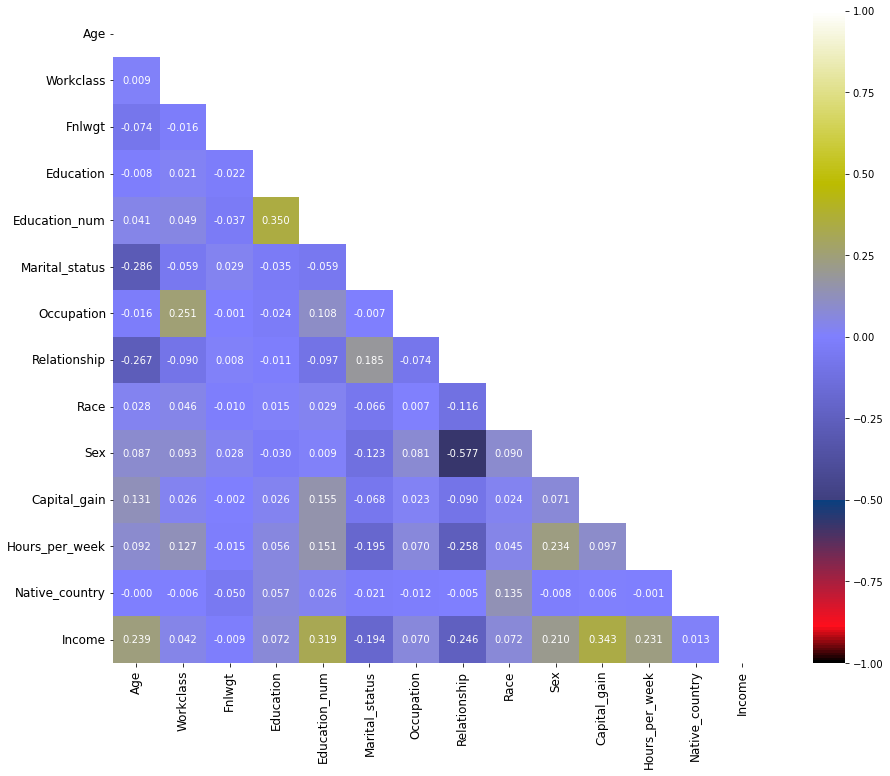

In [196]:
df_cor=df.drop('Capital_loss',axis=1).corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(17,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.224966,Age
1,1.074468,Workclass
2,1.008105,Fnlwgt
3,1.082524,Education
4,1.151094,Education_num
5,1.166128,Marital_status
6,1.080586,Occupation
7,2.027692,Relationship
8,1.047134,Race
9,1.893966,Sex


There is no multicollinearity found. we can proceed with data as the values are less than 10.

# Model Building

In [198]:
#X,y already initialized
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.829404,1.512317,-1.175698,-0.429474,0.981996,-0.322051,-0.656026,-0.733015,0.361261,0.612784,-0.38015,-2.637994,0.277208
1,-0.049506,0.072954,0.454456,0.137318,-0.631575,-1.852853,-0.177897,-0.121703,0.361261,0.612784,-0.38015,-0.147233,0.277208
2,1.022045,0.072954,0.644996,-2.696639,-1.438360,-0.322051,-0.177897,-0.733015,-2.216141,0.612784,-0.38015,-0.147233,0.277208
3,-0.973559,0.072954,1.576362,-0.429474,0.981996,-0.322051,0.778362,2.323547,-2.216141,-1.665550,-0.38015,-0.147233,-4.154761
4,-0.132447,0.072954,1.112189,0.420714,1.385388,-0.322051,-0.656026,2.323547,0.361261,-1.665550,-0.38015,-0.147233,0.277208


In [202]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9067057909726417  on random_state  96


In [203]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=96)

In [204]:
# different algorithm going to use

lg=LogisticRegression()
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier(n_estimators=100)
gd=GradientBoostingClassifier()
xgb=XGBClassifier()

In [205]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    #model prediction
    pred=model.predict(x_test)
    
    print("train accuracy score is {:.2f}%".format(accuracy_score(y_train,pred_train)*100))
    print("test accuracy score is {:.2f}%".format(accuracy_score(y_test,pred)*100))
    
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [206]:
#calling LogisticRegressionClassifier
evaluate(lg)

LogisticRegression()
train accuracy score is 76.37%
test accuracy score is 77.14%


Confusion Matrix : 
 [[4327 1450]
 [1199 4611]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      5777
           1       0.76      0.79      0.78      5810

    accuracy                           0.77     11587
   macro avg       0.77      0.77      0.77     11587
weighted avg       0.77      0.77      0.77     11587



In [207]:
#calling KNeighborsClassifier
evaluate(knn)

KNeighborsClassifier()
train accuracy score is 89.17%
test accuracy score is 85.54%


Confusion Matrix : 
 [[4576 1201]
 [ 475 5335]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      5777
           1       0.82      0.92      0.86      5810

    accuracy                           0.86     11587
   macro avg       0.86      0.86      0.85     11587
weighted avg       0.86      0.86      0.85     11587



In [208]:
#calling SVC Classifier
evaluate(sv)

SVC()
train accuracy score is 84.69%
test accuracy score is 84.89%


Confusion Matrix : 
 [[4546 1231]
 [ 520 5290]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      5777
           1       0.81      0.91      0.86      5810

    accuracy                           0.85     11587
   macro avg       0.85      0.85      0.85     11587
weighted avg       0.85      0.85      0.85     11587



In [209]:
#calling DecisionTreeClassifier
evaluate(dtc)

DecisionTreeClassifier()
train accuracy score is 100.00%
test accuracy score is 85.36%


Confusion Matrix : 
 [[4987  790]
 [ 906 4904]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      5777
           1       0.86      0.84      0.85      5810

    accuracy                           0.85     11587
   macro avg       0.85      0.85      0.85     11587
weighted avg       0.85      0.85      0.85     11587



In [210]:
#calling RandomForestClassifier
evaluate(rf)

RandomForestClassifier()
train accuracy score is 100.00%
test accuracy score is 90.48%


Confusion Matrix : 
 [[5160  617]
 [ 486 5324]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5777
           1       0.90      0.92      0.91      5810

    accuracy                           0.90     11587
   macro avg       0.91      0.90      0.90     11587
weighted avg       0.91      0.90      0.90     11587



In [211]:
#calling AdaBoostClassifier
evaluate(ada)

AdaBoostClassifier(n_estimators=100)
train accuracy score is 86.40%
test accuracy score is 87.28%


Confusion Matrix : 
 [[4874  903]
 [ 571 5239]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      5777
           1       0.85      0.90      0.88      5810

    accuracy                           0.87     11587
   macro avg       0.87      0.87      0.87     11587
weighted avg       0.87      0.87      0.87     11587



In [212]:
#calling GradientBoostingClassifier
evaluate(gd)

GradientBoostingClassifier()
train accuracy score is 86.89%
test accuracy score is 87.63%


Confusion Matrix : 
 [[4884  893]
 [ 540 5270]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      5777
           1       0.86      0.91      0.88      5810

    accuracy                           0.88     11587
   macro avg       0.88      0.88      0.88     11587
weighted avg       0.88      0.88      0.88     11587



In [213]:
#calling XGBClassifier
evaluate(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
train accuracy score is 93.20%
test accuracy score is 91.22%


Confusion Matrix : 
 [[5267  510]
 [ 507 5303]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      5777
          

In [214]:
model=[lg,knn,sv,dtc,rf,ada,gd,xgb]

for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")

LogisticRegression() Cross val score is  [75.73894283 76.77203582 76.53468551 76.95544287 77.10648398]    
mean is  76.62151820168678 


KNeighborsClassifier() Cross val score is  [83.78640777 84.50749811 86.21210487 86.10421836 86.41708922]    
mean is  85.4054636658158 


SVC() Cross val score is  [81.56418554 83.04024167 84.62617327 85.02535333 85.04693063]    
mean is  83.8605768867074 


DecisionTreeClassifier() Cross val score is  [77.00107875 84.29172511 87.73330456 88.45614414 87.97065487]    
mean is  85.09058148497684 


RandomForestClassifier() Cross val score is  [82.70765912 89.03873125 92.40479016 93.01974323 92.63135182]    
mean is  89.9604551157813 


AdaBoostClassifier(n_estimators=100) Cross val score is  [81.08953614 85.7266156  88.19721653 88.56403064 87.66857266]    
mean is  86.24919431360152 


GradientBoostingClassifier() Cross val score is  [80.90614887 86.07185241 88.49929874 89.13582911 88.43456684]    
mean is  86.60953919195452 


XGBClassifier(base_score=

# the least differene between test accuracy and crossvalidation is for KNeighborsClassifier and the difference is 0.14

we can select KNeighborsClassifier model as the best model

In [217]:
#parameters of RandomForestClassifier 
grid_params = { 
                'n_neighbors':[1,2,3,4,5,6,7,8],     #parameters for KNN classifier
             'weights':['uniform','distance'],
             'leaf_size':[10,20,30,40,50,60],

             'algorithm':['auto','ball_tree','kd_tree','brute']}


In [219]:
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(estimator=knn,param_grid=grid_params,cv= 5,n_jobs=-1)

In [220]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [221]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [223]:
hknn=KNeighborsClassifier(n_neighbors=1 ,weights='uniform', leaf_size= 10,algorithm='auto')


In [224]:
#calling hypertuned KNeighborsClassifier
evaluate(hknn)

KNeighborsClassifier(leaf_size=10, n_neighbors=1)
train accuracy score is 100.00%
test accuracy score is 87.83%


Confusion Matrix : 
 [[4804  973]
 [ 437 5373]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      5777
           1       0.85      0.92      0.88      5810

    accuracy                           0.88     11587
   macro avg       0.88      0.88      0.88     11587
weighted avg       0.88      0.88      0.88     11587



we are able to increase the accuracy of the model from 85.54 to 87.83%.We can go ahead with hypertuned knn model

In [225]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve

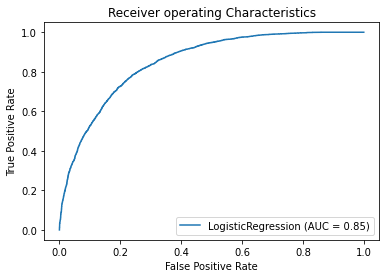

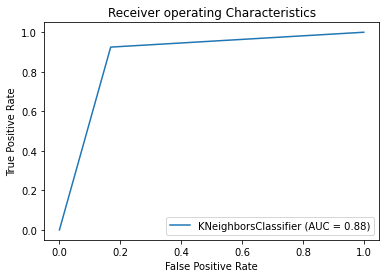

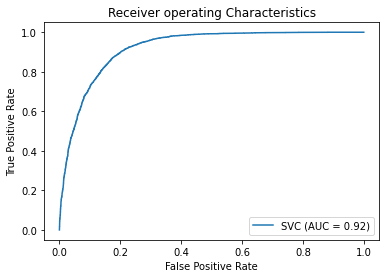

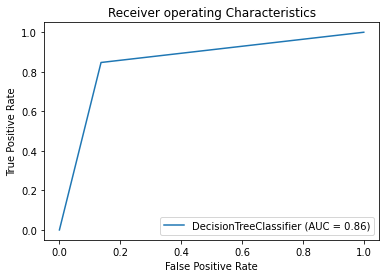

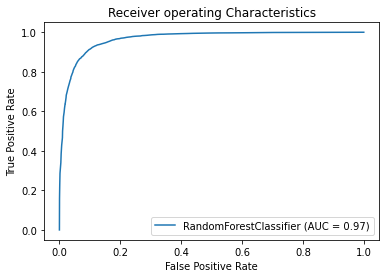

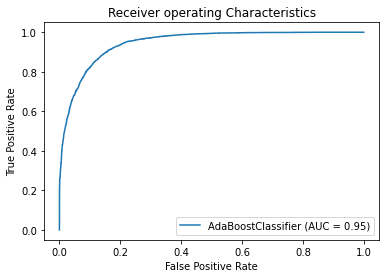

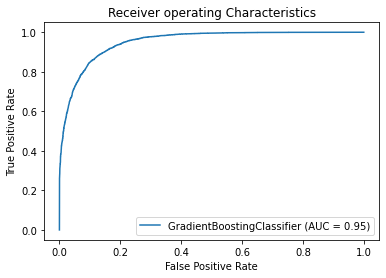

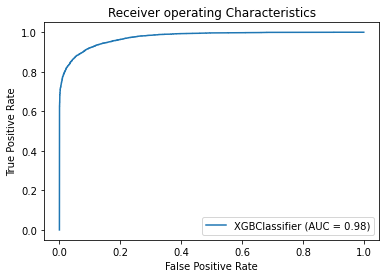

In [226]:
#lets see how well our models works on train data

model=[lg,hknn,sv,dtc,rf,ada,gd,xgb]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

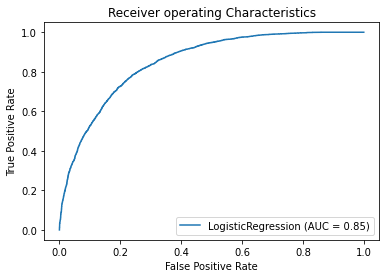

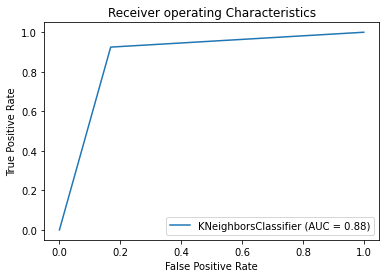

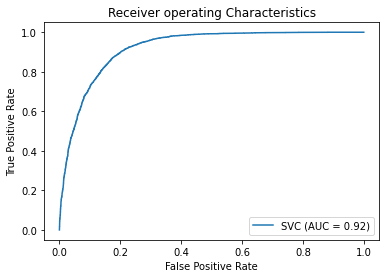

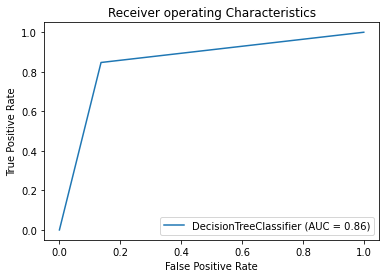

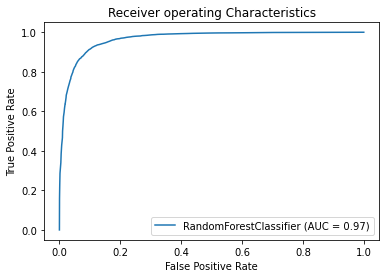

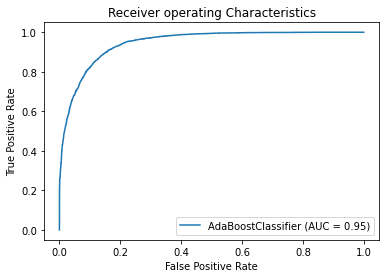

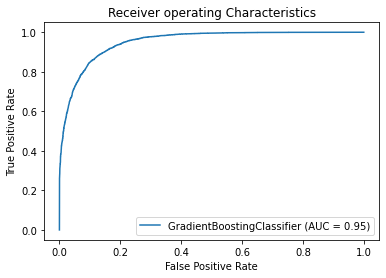

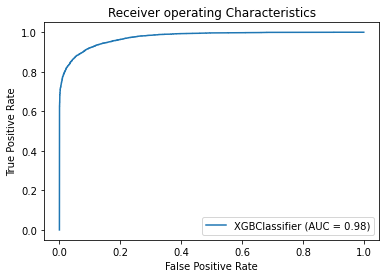

In [227]:
#lets see how well our models works on test data

model=[lg,hknn,sv,dtc,rf,ada,gd,xgb]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

with kneighbors classified model we are getting the 88% in the Roc plot

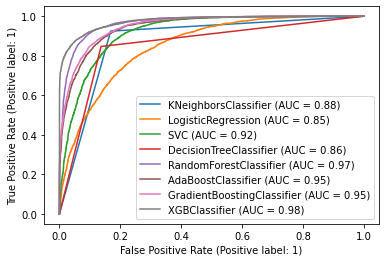

In [228]:
#combining  Roc curve of all models in to single plot


disp = plot_roc_curve(hknn,x_test,y_test)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gd, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

# Saving the model

In [229]:
#saving the model
joblib.dump(hknn,"census_income.obj")

['census_income.obj']

In [230]:
#Lets Check loading the file 

predicting_census_income=joblib.load("census_income.obj")

In [231]:
pred=hknn.predict(x_test)
Conclusion=pd.DataFrame([predicting_census_income.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,11577,11578,11579,11580,11581,11582,11583,11584,11585,11586
Predicted,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
Original,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


The jobfile created is working well and giving high accuracy.

After Training and Testing 8 algorithm model, The best accuracy model was determined as KNeighborsClassifier with 87.83% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase